# HW03 


### PART A

load `MNIST` dataset

train.shape:  (60000, 28, 28)   ,test.shape:  (10000, 28, 28)


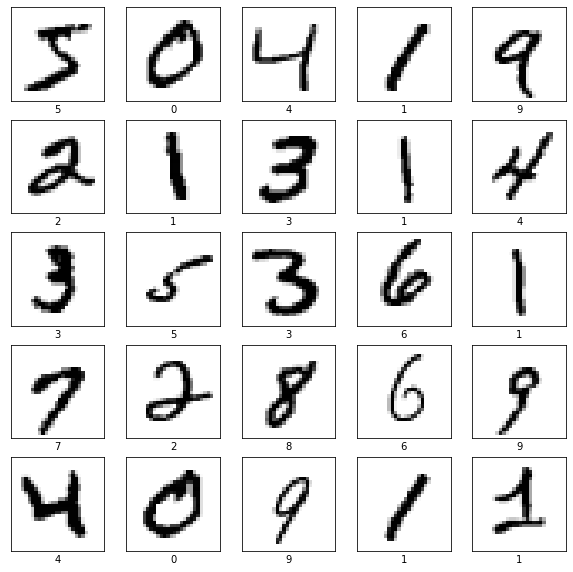

Data is loaded successfully :)


In [2]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(37) #dont change this line



(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('train.shape: ', x_train.shape, '  ,test.shape: ', x_test.shape)


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))
plt.show()

print('Data is loaded successfully :)')

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError
#%% for CCE


data_train = x_train.reshape((x_train.shape[0],-1))/255
data_test = x_test.reshape((x_test.shape[0],-1))/255

data_dim = data_train.shape[1];

In [68]:
ae_input = Input((data_dim))
ae_bottleneck = Dense(60, activation="sigmoid")(ae_input)
ae_output  = Dense(data_dim, activation="relu")(ae_bottleneck)

#create autoencoder model
autoencoder_model = Model(inputs=ae_input, outputs=ae_output)

autoencoder_model.compile(optimizer='adam', 
              loss=CategoricalCrossentropy(), 
              metrics=['accuracy'])

# plot the autoencoder
tf.keras.utils.plot_model(autoencoder_model, 'autoencoder_model.png', show_shapes=True)

history = autoencoder_model.fit(data_train, 
                    data_train,
                    batch_size=64,
                    epochs=10,
                    verbose=2,
                    validation_data=(data_test,data_test)
                    )


Epoch 1/10
938/938 - 4s - loss: 787.2660 - accuracy: 0.0061 - val_loss: 716.7789 - val_accuracy: 0.0032
Epoch 2/10
938/938 - 3s - loss: 693.1706 - accuracy: 0.0065 - val_loss: 699.2932 - val_accuracy: 0.0047
Epoch 3/10
938/938 - 3s - loss: 681.1230 - accuracy: 0.0076 - val_loss: 685.9216 - val_accuracy: 0.0058
Epoch 4/10
938/938 - 4s - loss: 675.2260 - accuracy: 0.0075 - val_loss: 683.3570 - val_accuracy: 0.0055
Epoch 5/10
938/938 - 4s - loss: 669.9653 - accuracy: 0.0071 - val_loss: 675.7560 - val_accuracy: 0.0113
Epoch 6/10
938/938 - 3s - loss: 668.8624 - accuracy: 0.0052 - val_loss: 676.7512 - val_accuracy: 0.0068
Epoch 7/10
938/938 - 4s - loss: 663.4329 - accuracy: 0.0084 - val_loss: 673.0494 - val_accuracy: 0.0060
Epoch 8/10
938/938 - 4s - loss: 662.5692 - accuracy: 0.0084 - val_loss: 673.1533 - val_accuracy: 0.0035
Epoch 9/10
938/938 - 4s - loss: 660.9417 - accuracy: 0.0083 - val_loss: 670.8445 - val_accuracy: 0.0104
Epoch 10/10
938/938 - 3s - loss: 660.5464 - accuracy: 0.0095 - v

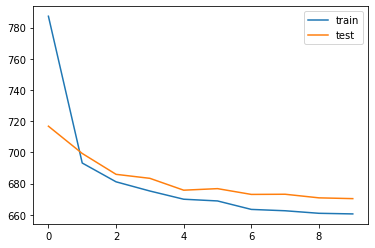

In [69]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

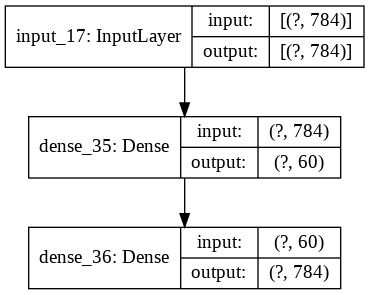

In [49]:
from IPython.display import Image 
Image('autoencoder_model.png')

In [66]:
# define an encoder model (without the decoder)
encoder = Model(inputs=ae_input, outputs=ae_bottleneck)
tf.keras.utils.plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

Encoder: 


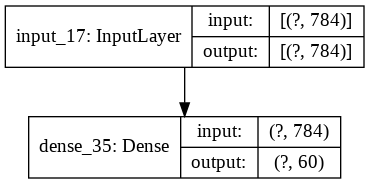

In [59]:
from IPython.display import Image 
print('Encoder: ')
Image('encoder_compress.png')

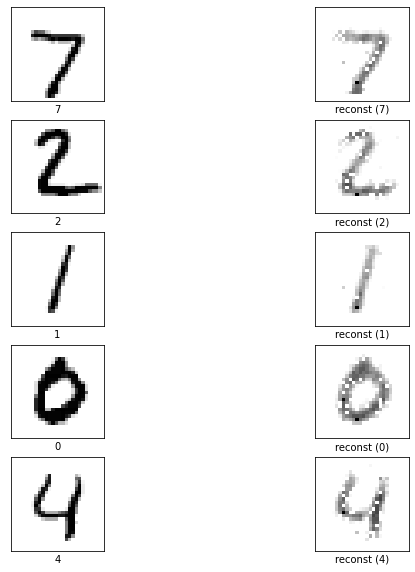

In [80]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test).reshape(-1,28,28)

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(y_test[i]))

    plt.subplot(5,2,2*i+2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_reconst[i], cmap=plt.cm.binary)
    plt.xlabel("reconst ({})".format(y_test[i]))
plt.show()